In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from pathlib import Path
import os

In [10]:
# Check and change the current working directory - A.F.
print(os.getcwd())
os.chdir(Path().resolve())

C:\Users\felix\OneDrive\Desktop\Capstone\1\DSE6311OM_Group3\Notebook


In [11]:
# read in data set with first column (district name) set to index
df = pd.read_excel("../Data/cleaned_data_encoded.xlsx", index_col =0)
df.head()

,high_needs_pct,english_learners_pct,low_income_pct,students_with_disabilities_pct,progress_toward_improvement_targets_pct,in_district_expenditures_per_pupil,graduation_rate_pct,still_in_school_pct,non_grad_completers_pct,hs_equivalency_pct,...,experienced_teachers_pct,DOR_income_per_capita,overall_classification_Not requiring assistance or intervention,overall_classification_Requiring assistance or intervention,reason_for_classification_In need of broad/comprehensive support,reason_for_classification_In need of focused/targeted support,reason_for_classification_Limited or no progress toward targets,reason_for_classification_Meeting or exceeding targets,reason_for_classification_Moderate progress toward targets,reason_for_classification_Substantial progress toward targets
district_name,,,,,,,,,,,,,,,,,,,,,
Abington,47.3,11.0,34.4,17.8,39,16609.95,88.9,1.3,0.7,0.0,...,81.3,37848.0,1,0,0,0,0,0,1,0
Acton-Boxborough,29.6,6.2,10.6,15.5,85,19407.68,96.1,3.2,0.2,0.0,...,88.3,69189.5,1,0,0,0,0,1,0,0
Agawam,51.4,6.2,40.7,18.3,46,20414.91,88.0,1.1,1.9,0.4,...,89.4,31126.0,1,0,0,0,0,0,1,0
Amesbury,46.4,2.7,33.8,23.7,47,22338.70,88.3,2.5,0.8,0.8,...,89.0,41139.0,1,0,0,0,0,0,1,0
Amherst-Pelham,44.0,7.3,29.8,24.2,33,26177.60,90.9,4.1,0.9,0.9,...,81.3,34325.0,0,1,0,1,0,0,0,0


### A.F.
Based on the correlation heat map, there is a strong correlation between 'high_needs_pct' and 'low_income_pct'.  This is explored here to determine if a new feature can be created encompassing both values. 

In [12]:
correlation = df['high_needs_pct'].corr(df['low_income_pct'])  
print(correlation)

0.9868909208590384


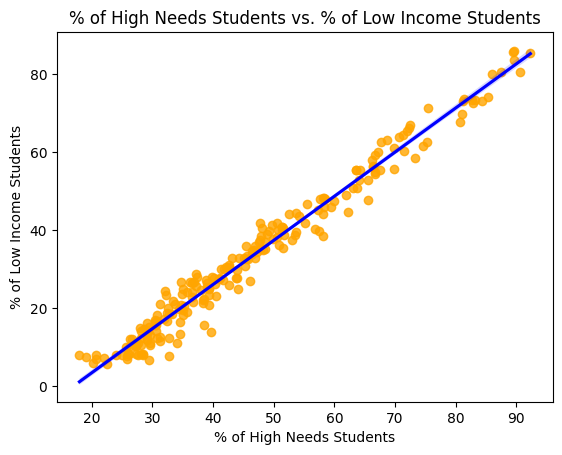

In [13]:
# Scatter plot with regression line
sns.regplot(x='high_needs_pct', y='low_income_pct', data=df, color = "orange", scatter=True, line_kws={"color": "blue"})
plt.xlabel('% of High Needs Students')
plt.ylabel('% of Low Income Students')
plt.title('% of High Needs Students vs. % of Low Income Students')
plt.show()


In [14]:
# Five number summary of the 'high_needs_pct' and 'low_income_pct' columns
summary_high_needs = df['high_needs_pct'].describe()
summary_low_income = df['low_income_pct'].describe()

print("Five Number Summary for High Needs Percentage:")
print(summary_high_needs)

Five Number Summary for High Needs Percentage:
count    223.000000
mean      46.479821
std       17.473859
min       18.000000
25%       32.450000
50%       42.700000
75%       57.900000
max       92.300000
Name: high_needs_pct, dtype: float64


In [15]:
print("\nFive Number Summary for Low Income Percentage:")
print(summary_low_income)


Five Number Summary for Low Income Percentage:
count    223.000000
mean      33.319283
std       20.054137
min        5.600000
25%       16.650000
50%       29.800000
75%       44.850000
max       86.000000
Name: low_income_pct, dtype: float64


I would like to split each of these columns into three sections - Low, Moderate, and High.
To do so, I will use tertiles.  From there I would like to define a new variable called 'needs_income' that will have the following values to describe the school districts overall level of student needs and municipality average income:
"Low Needs, Low Income"
"Low Needs, Moderate Income"
"Low Needs, High Income"
"Moderate Needs, Low Income"
"Moderate Needs, Moderate Income"
"Moderate Needs, High Income"
"High Needs, Low Income"
"High Needs, Moderate Income"
"High Needs, High Income"

In [16]:
percentiles = {
    'high_needs_pct': df['high_needs_pct'].quantile([1/3, 2/3]),
    'low_income_pct': df['low_income_pct'].quantile([1/3, 2/3])
}

print("\nPercentiles (1/3 and 2/3):")
print(percentiles)


Percentiles (1/3 and 2/3):
{'high_needs_pct': 0.333333    35.2
0.666667    50.9
Name: high_needs_pct, dtype: float64, 'low_income_pct': 0.333333    21.6
0.666667    39.4
Name: low_income_pct, dtype: float64}


In [17]:

# Clean column names and ensure numeric types
df.columns = df.columns.str.strip()
df['high_needs_pct'] = pd.to_numeric(df['high_needs_pct'], errors='coerce')
df['low_income_pct'] = pd.to_numeric(df['low_income_pct'], errors='coerce')

conditions = [
    (df['high_needs_pct'] <= 35.2) & (df['low_income_pct'] > 39.4),
    (df['high_needs_pct'] <= 35.2) & (df['low_income_pct'] > 21.6) & (df['low_income_pct'] <= 39.4),
    (df['high_needs_pct'] <= 35.2) & (df['low_income_pct'] <= 21.6),
    (df['high_needs_pct'] > 35.2) & (df['high_needs_pct'] <= 50.9) & (df['low_income_pct'] > 39.4),
    (df['high_needs_pct'] > 35.2) & (df['high_needs_pct'] <= 50.9) & (df['low_income_pct'] > 21.6) & (df['low_income_pct'] <= 39.4),
    (df['high_needs_pct'] > 35.2) & (df['high_needs_pct'] <= 50.9) & (df['low_income_pct'] <= 21.6),
    (df['high_needs_pct'] > 50.9) & (df['low_income_pct'] > 39.4),
    (df['high_needs_pct'] > 50.9) & (df['low_income_pct'] > 21.6) & (df['low_income_pct'] <= 39.4),
    (df['high_needs_pct'] > 50.9) & (df['low_income_pct'] <= 21.6),
]

choices = [
    "Low Needs, Low Income",
    "Low Needs, Moderate Income",
    "Low Needs, High Income",
    "Moderate Needs, Low Income",
    "Moderate Needs, Moderate Income",
    "Moderate Needs, High Income",
    "High Needs, Low Income",
    "High Needs, Moderate Income",
    "High Needs, High Income"
]

df['needs_income'] = np.select(conditions, choices, default="Unclassified")

# Check results
df.head()

,high_needs_pct,english_learners_pct,low_income_pct,students_with_disabilities_pct,progress_toward_improvement_targets_pct,in_district_expenditures_per_pupil,graduation_rate_pct,still_in_school_pct,non_grad_completers_pct,hs_equivalency_pct,...,DOR_income_per_capita,overall_classification_Not requiring assistance or intervention,overall_classification_Requiring assistance or intervention,reason_for_classification_In need of broad/comprehensive support,reason_for_classification_In need of focused/targeted support,reason_for_classification_Limited or no progress toward targets,reason_for_classification_Meeting or exceeding targets,reason_for_classification_Moderate progress toward targets,reason_for_classification_Substantial progress toward targets,needs_income
district_name,,,,,,,,,,,,,,,,,,,,,
Abington,47.3,11.0,34.4,17.8,39,16609.95,88.9,1.3,0.7,0.0,...,37848.0,1,0,0,0,0,0,1,0,"Moderate Needs, Moderate Income"
Acton-Boxborough,29.6,6.2,10.6,15.5,85,19407.68,96.1,3.2,0.2,0.0,...,69189.5,1,0,0,0,0,1,0,0,"Low Needs, High Income"
Agawam,51.4,6.2,40.7,18.3,46,20414.91,88.0,1.1,1.9,0.4,...,31126.0,1,0,0,0,0,0,1,0,"High Needs, Low Income"
Amesbury,46.4,2.7,33.8,23.7,47,22338.70,88.3,2.5,0.8,0.8,...,41139.0,1,0,0,0,0,0,1,0,"Moderate Needs, Moderate Income"
Amherst-Pelham,44.0,7.3,29.8,24.2,33,26177.60,90.9,4.1,0.9,0.9,...,34325.0,0,1,0,1,0,0,0,0,"Moderate Needs, Moderate Income"


In [18]:
print(df[['high_needs_pct', 'low_income_pct', 'needs_income']].head())

                  high_needs_pct  low_income_pct  \
district_name                                      
Abington                    47.3            34.4   
Acton-Boxborough            29.6            10.6   
Agawam                      51.4            40.7   
Amesbury                    46.4            33.8   
Amherst-Pelham              44.0            29.8   

                                     needs_income  
district_name                                      
Abington          Moderate Needs, Moderate Income  
Acton-Boxborough           Low Needs, High Income  
Agawam                     High Needs, Low Income  
Amesbury          Moderate Needs, Moderate Income  
Amherst-Pelham    Moderate Needs, Moderate Income  
